In [24]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

data = pd.read_csv('iris.data',header=None)
data

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [25]:
from sklearn.cluster import KMeans
no_labeled_data = data.iloc[:,:4]
k_means = KMeans(init='k-means++', n_clusters=3, n_init=15)
k_means.fit(no_labeled_data)

KMeans(n_clusters=3, n_init=15)

In [26]:
from sklearn.metrics.pairwise import pairwise_distances_argmin
k_means_cluster_centers = k_means.cluster_centers_
k_means_labels = pairwise_distances_argmin(no_labeled_data,
k_means_cluster_centers)


[<Axes: > <Axes: > <Axes: >]


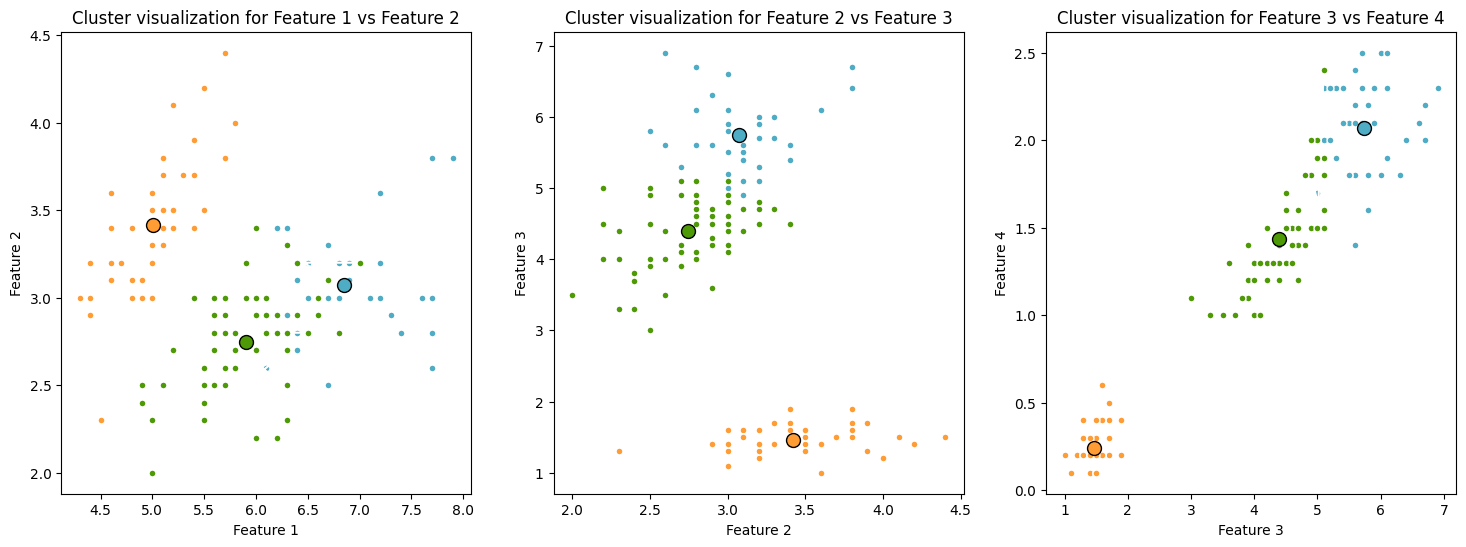

In [27]:
import matplotlib.pyplot as plt 

if isinstance(no_labeled_data, pd.DataFrame):
    no_labeled_data = no_labeled_data.values

f, ax = plt.subplots(1, 3, figsize=(18, 6)) 
colors = ['#4EACC5', '#FF9C34', '#4E9A06']
print(ax) 
for i in range(3): 
    my_members = k_means_labels == i 
    cluster_center = k_means_cluster_centers[i] 
    for j in range(3): 
        ax[j].plot(no_labeled_data[my_members, j], 
                   no_labeled_data[my_members, j+1], 
                   'w', 
                   markerfacecolor=colors[i], 
                   marker='o', markersize=5) 
        ax[j].plot(cluster_center[j], 
                   cluster_center[j+1], 
                   'o', 
                   markerfacecolor=colors[i], 
                   markeredgecolor='k', 
                   markersize=10) 
        

ax[0].set_title('Cluster visualization for Feature 1 vs Feature 2')
ax[0].set_xlabel('Feature 1')
ax[0].set_ylabel('Feature 2')

ax[1].set_title('Cluster visualization for Feature 2 vs Feature 3')
ax[1].set_xlabel('Feature 2')
ax[1].set_ylabel('Feature 3')

ax[2].set_title('Cluster visualization for Feature 3 vs Feature 4')
ax[2].set_xlabel('Feature 3')
ax[2].set_ylabel('Feature 4')

plt.show()



# digits: 3; # samples: 150; # features 4


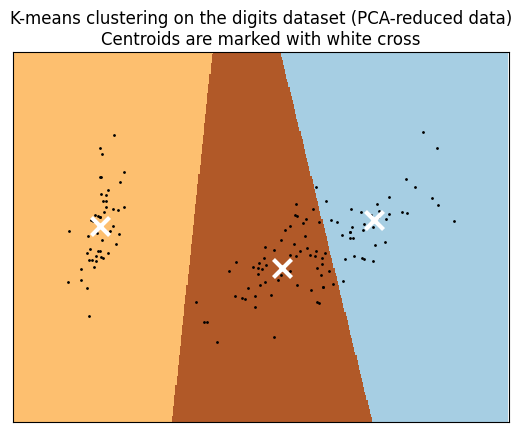

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [28]:
from sklearn.datasets import load_iris

data, labels = load_iris(return_X_y=True)
(n_samples, n_features), n_digits = data.shape, np.unique(labels).size

print(f"# digits: {n_digits}; # samples: {n_samples}; # features {n_features}")


from time import time

from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


def bench_k_means(kmeans, name, data, labels):
    t0 = time()
    estimator = make_pipeline(StandardScaler(), kmeans).fit(data)
    fit_time = time() - t0
    results = [name, fit_time, estimator[-1].inertia_]

    # Define the metrics which require only the true labels and estimator
    # labels
    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
    ]
    results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]

    # The silhouette score requires the full dataset
    results += [
        metrics.silhouette_score(
            data,
            estimator[-1].labels_,
            metric="euclidean",
            sample_size=300,
        )
    ]

    # Show the results
    formatter_result = (
        "{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}"
    )
    print(formatter_result.format(*results))


import matplotlib.pyplot as plt

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()



# Исключение лейблов, если они имеются
no_labeled_data = data.iloc[:, :4]

# Сначала используем 'random' инициализацию
n_clusters = 3
n_init = 5

random_kmeans = KMeans(init='random', n_clusters=n_clusters, n_init=n_init)
random_kmeans.fit(no_labeled_data)

random_cluster_centers = random_kmeans.cluster_centers_
random_labels = pairwise_distances_argmin(no_labeled_data, ran-dom_cluster_centers)

# Ручная инициализация с учетом 4 признаков
initial_centroids = np.array([[4, 2, 1, 3], [1, 2, 3, 4], [2, 2, 2, 2]])  # Из-менено на 4 признака

manual_kmeans = KMeans(init=initial_centroids, n_clusters=n_clusters, n_init=n_init)
manual_kmeans.fit(no_labeled_data)

manual_cluster_centers = manual_kmeans.cluster_centers_
manual_labels = pairwise_distances_argmin(no_labeled_data, manu-al_cluster_centers)

# Отображение результатов
f, ax = plt.subplots(2, 3, figsize=(18, 12))
colors = ['#4EACC5', '#FF9C34', '#4E9A06']

if isinstance(no_labeled_data, pd.DataFrame):
    no_labeled_data = no_labeled_data.values

for kmeans_result, clusters_centers, labels, row_idx in zip(
        ["Random Init", "Manual Init"],
        [random_cluster_centers, manual_cluster_centers],
        [random_labels, manual_labels],
        [0, 1]):
    
    for i in range(n_clusters):
        my_members = labels == i
        cluster_center = clusters_centers[i] 
        for j in range(3):
            ax[row_idx, j].plot(no_labeled_data[my_members, j], 
                                no_labeled_data[my_members, j+1], 
                                'w', 
                                markerfacecolor=colors[i], 
                                marker='o', markersize=5)
            ax[row_idx, j].plot(cluster_center[j], 
                                cluster_center[j+1], 
                                'o', 
                                markerfacecolor=colors[i], 
                                markeredgecolor='k', 
                                markersize=10)
                                
# Настройка заголовков и меток
titles = [
    'Cluster visualization for Feature 1 vs Feature 2',
    'Cluster visualization for Feature 2 vs Feature 3',
    'Cluster visualization for Feature 3 vs Feature 4'
]

for i in range(3):
    ax[0, i].set_title(f'Random Init: {titles[i]}')
    ax[1, i].set_title(f'Manual Init: {titles[i]}')

    ax[0, i].set_xlabel(f'Feature {i+1}')
    ax[0, i].set_ylabel(f'Feature {i+2}')
    
    ax[1, i].set_xlabel(f'Feature {i+1}')
    ax[1, i].set_ylabel(f'Feature {i+2}')

plt.show()


k_means = KMeans(init="k-means++", n_clusters=3, n_init=10)
k_means.fit(no_labeled_data)


In [ ]:
from sklearn.metrics.pairwise import pairwise_distances_argmin 
k_means_cluster_centers = k_means.cluster_centers_ 
k_means_labels = pairwise_distances_argmin(no_labeled_data, k_means_cluster_centers)


sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(no_labeled_data)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 10), sse, marker='o')
plt.title('Метод "Локтя"')
plt.xlabel('Количество кластеров')
plt.ylabel('Сумма квадратов расстояний')
plt.show()


In [30]:
from sklearn.cluster import MiniBatchKMeans
batch_size = 45
mbk = MiniBatchKMeans(
    init="k-means++",
    n_clusters=3,
    batch_size=batch_size,
    n_init=10,
    max_no_improvement=10,
    verbose=0,
)

mbk.fit(no_labeled_data)


from sklearn.metrics.pairwise import pairwise_distances_argmin

k_means_cluster_centers = k_means.cluster_centers_
order = pairwise_distances_argmin(k_means.cluster_centers_, mbk.cluster_centers_)
mbk_means_cluster_centers = mbk.cluster_centers_[order]

k_means_labels = pairwise_distances_argmin(no_labeled_data, k_means_cluster_centers)
mbk_means_labels = pairwise_distances_argmin(no_labeled_data, mbk_means_cluster_centers)


import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 3))
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)
colors = ["#4EACC5", "#FF9C34", "#4E9A06"]

# KMeans
ax = fig.add_subplot(1, 3, 1)
for k, col in zip(range(n_clusters), colors):
    my_members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    ax.plot(no_labeled_data[my_members, 0], no_labeled_data[my_members, 1], "w", markerfacecolor = col, marker = ".")
    ax.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=10,
    )
ax.set_title("KMeans")
ax.set_xticks(())
ax.set_yticks(())


# MiniBatchKMeans
ax = fig.add_subplot(1, 3, 2)
for k, col in zip(range(n_clusters), colors):
    my_members = mbk_means_labels == k
    cluster_center = mbk_means_cluster_centers[k]
    ax.plot(no_labeled_data[my_members, 0], no_labeled_data[my_members, 1], "w", markerfacecolor=col, marker=".")
    ax.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=10,
    )
ax.set_title("MiniBatchKMeans")
ax.set_xticks(())
ax.set_yticks(())


# Initialize the different array to all False
different = mbk_means_labels == 4
ax = fig.add_subplot(1, 3, 3)

for k in range(n_clusters):
    different += (k_means_labels == k) != (mbk_means_labels == k)

identical = np.logical_not(different)
ax.plot(no_labeled_data[identical, 0], no_labeled_data[identical, 1], "w", mark-erfacecolor="#bbbbbb", marker=".")
ax.plot(no_labeled_data[different, 0], no_labeled_data[different, 1], "w", mark-erfacecolor="m", marker=".")
ax.set_title("Difference")
ax.set_xticks(())
ax.set_yticks(())

plt.show()


SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (184060145.py, line 58)